Author: Aleksandar Nikolic

In [5]:
import matplotlib.pyplot as plt  
# iscrtavanje slika i plotova unutar samog browsera
%matplotlib inline 

import matplotlib.pylab as pylab
# prikaz vecih slika 
pylab.rcParams['figure.figsize'] = 16,12

import numpy as np
import cv2 # OpenCV biblioteka

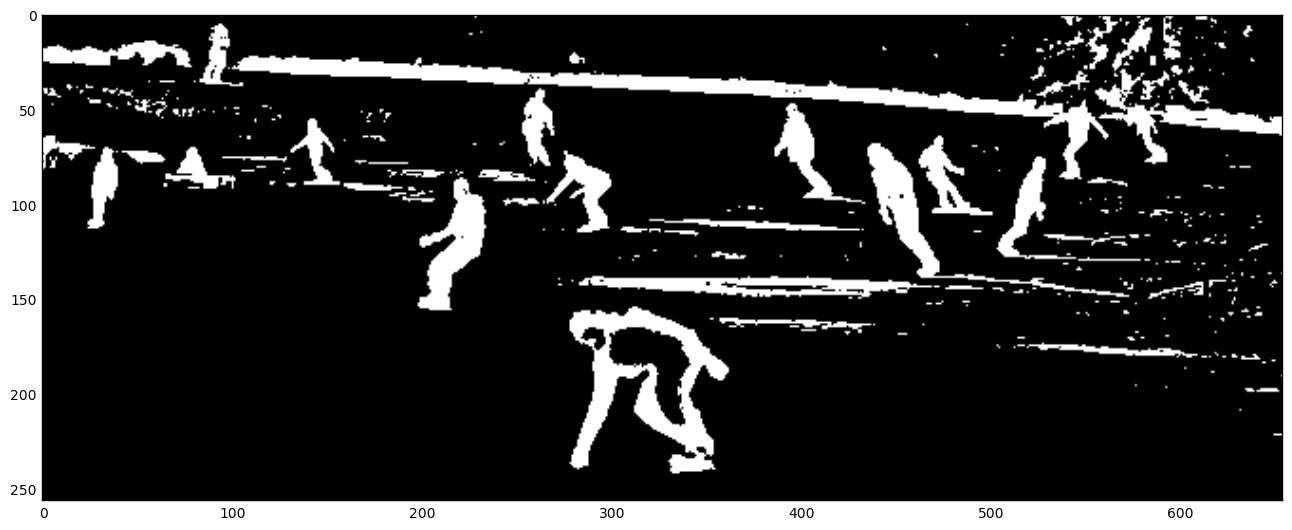

In [6]:
img_snow = cv2.cvtColor(cv2.imread('../../images/snowboarders.jpg'), cv2.COLOR_BGR2RGB)

img_snow_gs = cv2.cvtColor(img_snow, cv2.COLOR_RGB2GRAY) # konvert u grayscale)
#edges = cv2.Canny(img_snow_gs,20,300)
# plt.imshow(img_snow_gs, 'gray')
img_snow_bin = cv2.adaptiveThreshold(img_snow_gs, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV,23, 15)
# ret, img_snow_bin = cv2.threshold(img_snow_gs, 0, 255, cv2.THRESH_OTSU)
# ret, img_snow_bin = cv2.threshold(img_snow_gs, 100, 255, cv2.THRESH_BINARY_INV)
plt.imshow(img_snow_bin, 'gray')
#img_snow_bin = edges

Ukupan broj skijasa: 14


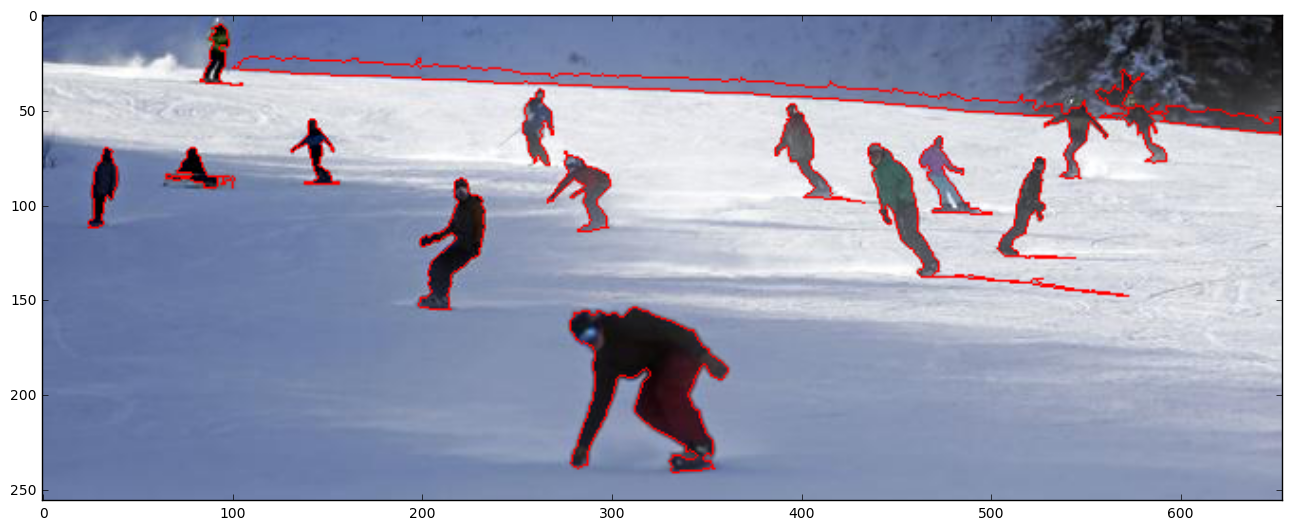

In [7]:
img, contours, hierarchy = cv2.findContours(img_snow_bin, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours_snow = [] 
for contour in contours: 
    center, size, angle = cv2.minAreaRect(contour) 
    height, width = size
    area = cv2.contourArea(contour)
    x, y = center;
    if width > 10 and height > 15 and area > 150:
        contours_snow.append(contour)

img = img_snow.copy()
cv2.drawContours(img, contours_snow, -1, (255, 0, 0), 1)
plt.imshow(img)
print 'Ukupan broj skijasa: %d' % len(contours_snow)